# ExplainableBoostingClassifier

### Import libraries and packages

In [282]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
import pickle


RANDOM_SEED=256

### Current folder

In [232]:
!ls

01_dataset_processing.ipynb            images
02_ExplainableBoostingClassifier.ipynb saved_models
README.md                              tmp
dataset                                venv


### Read processed dataset as *.csv file

In [233]:
data = pd.read_csv("./dataset/DatasetProcessed.csv")

### Sample of the fist 5 raws of dataset

In [234]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [235]:
churn = data.loc[:, data.columns == "Churn"].columns
print(churn)

Index(['Churn'], dtype='object')


`We're getting features and target values. Features are all columns except "Churn" column which is target.`

In [236]:
train_cols = data.drop('Churn', axis='columns').columns
X = data[train_cols]
y = data[churn]

In [237]:
X.shape

(7032, 26)

In [238]:
y.shape

(7032, 1)

In [239]:
type(X)

pandas.core.frame.DataFrame

`We're splitting dataset into train and test dataset with function train_test_split from package sklearn.model_selection with parameters test_size = 0.20, stratify = y and random_state = 256. Model will learn on train dataset and evaluate on test dataset. Parameter stratify is include because of the uniform distribution of the target value in these sets.`

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

In [241]:
type(X_train)

pandas.core.frame.DataFrame

`Shape of train and test datasets`

In [242]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 26)
(5625, 1)
(1407, 26)
(1407, 1)


### Standard scaler

`We're scaling data to the same scale. After that, every feature will have mean value equals 0 and unit variance,
which is important for non existence side effects of feature from different scales. 
For example, feature scaled in millimeters will have bigger influence on target value than feature scaled in kilometers, but maybe it is less influence in reality. This is just one of the many reasons why should we use scaling before building model.`

In [243]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [244]:
X_train.shape

(5625, 26)

In [245]:
type(X_train)

numpy.ndarray

### Applying ExplainableBoostingClassifier model from interpret.glassbox package

In [246]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier(feature_names=columns,random_state=RANDOM_SEED)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines',
                                             'OnlineSecurity', 'OnlineBackup',
                                             'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling',
                                             'MonthlyCharges', 'TotalCharges',
                                             'PaymentMethod_Bank transfer '
                                             '(automatic)',
                                             'PaymentMethod_Credit card '
                                             '...
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'interaction', 'interaction',
                                             'interaction', 'interaction', ...],
                              random_state=256)

These explanation is borrowed from the official InterpretML site. This part of code helps us to show relations between attributes directly into the notebook.

`By default, interpret hosts visualizations on a local web server using Plotly Dash. In some restricted environments, where applications are not allowed to host a local web server, we embed visualizations directly into the notebook. If Interpret did not automatically detect and switch the rendering mode, you can manually embed visualizations in restricted environments with the following code: `

In [247]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

`Provides global explanation for model. We get information about importance of attributes in model and for every attribute we get score between attribute and target value and density of instances.`


In [266]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

`An example of explain_global visualisation for importance of attributes:`

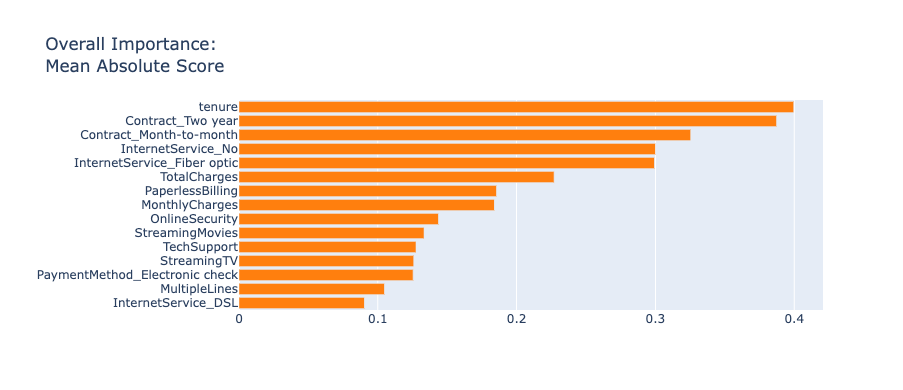

`An example of explain_global visualisation for tenure attribute:`


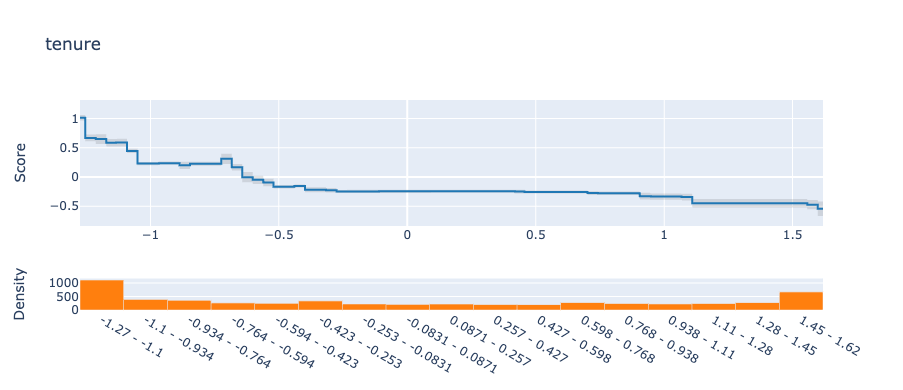

`Return the mean accuracy on the given train and test data and labels. It represents how much instances has predicted true of all predicted instances.`

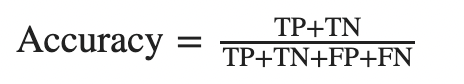

In [249]:
print("Train accuracy score : {}, Test accuracy score : {} ".format(ebm.score(X_train,y_train), ebm.score(X_test,y_test)))

Train accuracy score : 0.8163555555555555, Test accuracy score : 0.7960199004975125 


`Visualizing feature-value pairs for each sample from test dataset as horizontal bar charts.`

In [250]:
ebm_local = ebm.explain_local(X_test[:50], y_test[:50])
show(ebm_local)

`An example of explain_local visualisation for negative target value:`

`We can conclude that attribute "Contract_Two_year" has positive effect for increasing probability for predicting negative target value (0) and attributes "tenure" and "TotalCharges" have negative effect for increasing probability for prediction negative (0) target value.`

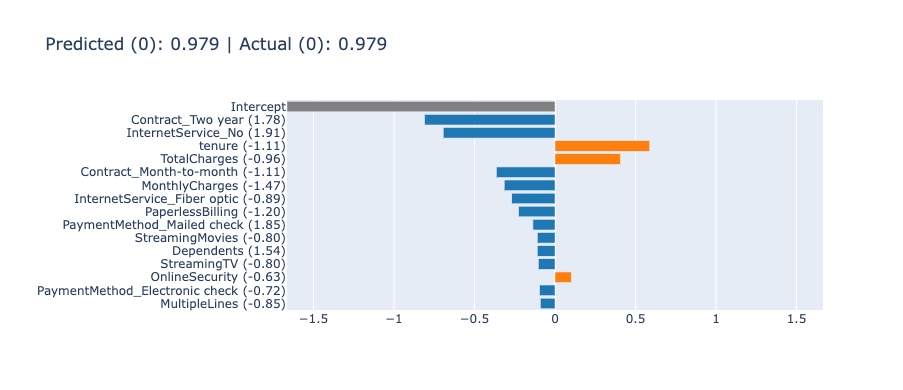

`An example of explain_local visualisation for positive target value:`

`We can conclude that attributes "tenure", "InternetService_Fiber optic" and "TotalCharges" have positive effect for increasing probability for predicting positive target value.`

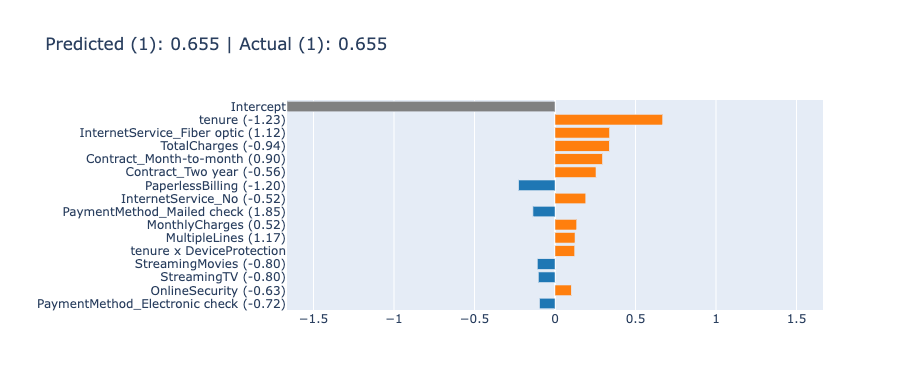

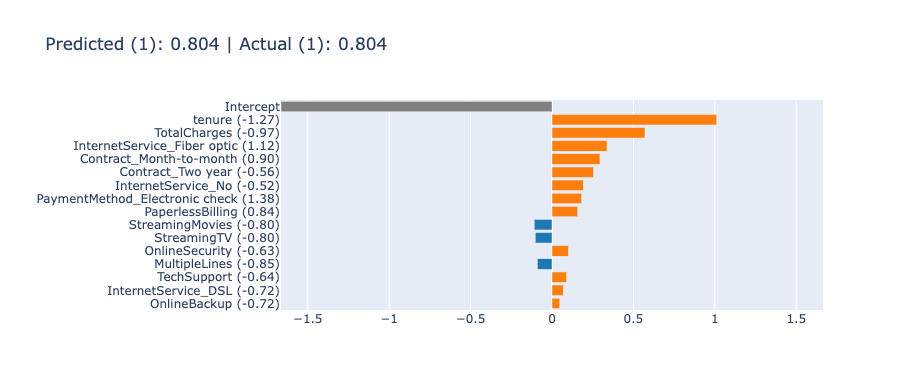

In [251]:
y_predict = ebm.predict(X_test)

In [252]:
type(y_test)

pandas.core.frame.DataFrame

In [255]:
y_test = y_test.to_numpy()

In [253]:
type(y_predict)

numpy.ndarray

In [257]:
np.sum(y_predict == y_test[0])

1124

In [258]:
np.sum(y_predict != y_test[0])

283

In [259]:
type(X_test)

numpy.ndarray

In [260]:
df = pd.DataFrame(X_test, columns = X.columns.to_list())


print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [262]:
df[y_predict != y_test[0]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5,-1.011623,2.276251,-0.959060,-0.647872,-0.785320,0.328207,-0.852672,-0.634896,-0.719589,1.374971,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
6,0.988510,2.276251,1.042688,-0.647872,-0.785320,0.328207,1.172784,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
22,0.988510,-0.439319,-0.959060,-0.647872,-1.274235,0.328207,-0.852672,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
26,-1.011623,-0.439319,1.042688,-0.647872,-0.785320,0.328207,1.172784,-0.634896,1.389681,1.374971,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
32,-1.011623,2.276251,-0.959060,-0.647872,0.192509,0.328207,1.172784,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,-1.011623,-0.439319,-0.959060,-0.647872,-1.152006,0.328207,-0.852672,-0.634896,-0.719589,-0.727288,...,-0.525993,1.921304,-0.723863,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891
1377,0.988510,-0.439319,-0.959060,-0.647872,-1.233492,-3.046861,-0.852672,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,1.387486,-0.890249,-0.524891
1389,-1.011623,-0.439319,-0.959060,-0.647872,-1.274235,0.328207,-0.852672,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,1.387486,-0.890249,-0.524891
1394,-1.011623,-0.439319,-0.959060,-0.647872,-1.192749,0.328207,1.172784,-0.634896,-0.719589,-0.727288,...,-0.525993,-0.520480,1.381477,-0.540841,0.899591,-0.512747,-0.560582,-0.720728,1.123281,-0.524891


`We can see in classification report that out model predicts well negative target values, but predicting positive target values could be better. As recall for negativ taget value is less than precision, we can conclude that our model rarely predicts positive values. It could be because of the impbalaced dataset or because of the large number of attributes. So, the model is overfitting.`

In [263]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407



### Confusion matrix

In [264]:
cf_matrix = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

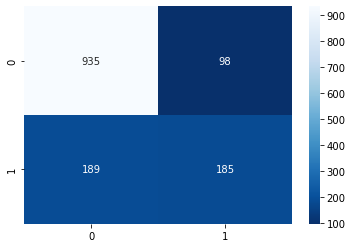

In [281]:
sns.heatmap(cf_matrix, annot=True, fmt='.22g', cmap='Blues_r')


### Display AUC on train and test dataset

`We can see that Roc Curve for train set has a little better results than Roc Curve for test set, but it isn't drastically difference.`

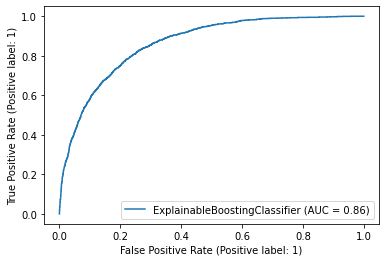

In [271]:
RocCurveDisplay.from_estimator(ebm, X_train, y_train)

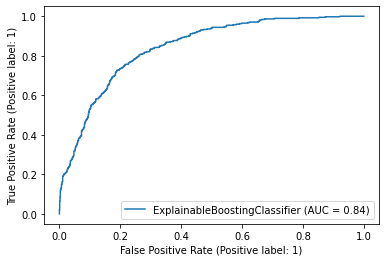

In [272]:
RocCurveDisplay.from_estimator(ebm, X_test, y_test)

## Saving model and scaler

In [285]:
model_filename = './saved_models/ExplainableBoostingClassifier.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(ebm, pickle_file)
    
scaler_filename = './saved_models/ExplainableBoostingClassifier.scaler'

with open(scaler_filename, 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

## Test model for one instance

In [286]:
with open(model_filename, 'rb') as pickle_file:
    model_revived = pickle.load(pickle_file)
    
with open(scaler_filename, 'rb') as pickle_file:
    scaler_revived = pickle.load(pickle_file)

In [300]:
random_index = np.random.randint(0, X_test.shape[0])

In [301]:
instance = X_test[random_index]

In [302]:
instance = instance.reshape(1,26)

In [303]:
instance.shape

(1, 26)

In [304]:
instance = pd.DataFrame(instance, columns=X.columns.to_list())

In [305]:
new_instance_scaled = scaler_revived.transform(instance)
new_value = model_revived.predict(new_instance_scaled)

In [306]:
new_value

array([0])

In [307]:
y_test[random_index]

array([0])